In [202]:
#importing neccessary libraries
import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np

In [203]:
#imported the data 
data1=pd.read_csv('ideal.csv')
data2=pd.read_csv('train.csv')
data3=pd.read_csv('test.csv')

In [204]:
#connecting to the sqlite database file using sqlalchemy
database='sqlite:///C:\sqlite\database_space\database_1.db'
engine=sqlalchemy.create_engine(database)

In [205]:
#now I will send the data from dataframe to database and create tables in the database
data1.to_sql('ideal_table',con=engine,index=False,if_exists='replace')
data2.to_sql('train_table',con=engine,index=False,if_exists='replace')
data3.to_sql('test_table',con=engine,index=False,if_exists='replace')

100

In [206]:
#in order to further visualization it is comfortable to use dataframes
#so fetching all data from sqlite database for all the 3 table and making it into DataFrames
conn=engine.connect()
value=conn.execute(sqlalchemy.text('SELECT * FROM ideal_table'))
row_values=value.fetchall()
column_values=value.keys()
#ideal table data
ideal=pd.DataFrame(row_values,columns=column_values)

In [207]:
value1=conn.execute(sqlalchemy.text('SELECT * FROM train_table'))
row_values1=value1.fetchall()
column_values1=value1.keys()
#train table data
train=pd.DataFrame(row_values1,columns=column_values1)

In [208]:
value2=conn.execute(sqlalchemy.text('SELECT * FROM test_table'))
row_values2=value2.fetchall()
column_values2=value2.keys()
#test table data
test=pd.DataFrame(row_values2,columns=column_values2)

In [209]:
train.x[360]

16.0

In [210]:
class Slope():
    def slopecheck(self,val,column_val):
        #here val has 2 values 1 for ideal, 2 for train
        x1=-19.8 #index 2
        x2=16    #index 360
        x_val=x2-x1
        if val==1:
            #slope formula (y2-y1)/(x2-x1)
            #I will take 2 fixed x points and use those y values for coming y columns
            slope=(ideal[column_val][360]-ideal[column_val][2])/x_val
        else:
            slope=(train[column_val][360]-train[column_val][2])/x_val
        return slope
        
    def errorcheck(self,train_col,ideal_col):
        #for error calculation we are using Mean Squared Error
        n=len(train[train_col])
        a=[(train[train_col][i]-ideal[ideal_col][i])**2 for i in range(n)]
        return (1/n)*sum(a)
            
            
        

In [211]:
#here we are inheriting the Slope class
class Column_comparision(Slope):
    def comparision(self,train_col_val,ideal_col_val):
        #here we compare the ideal with train
        count=0
        try:
            #taking only the proper values
            if len(train[train_col_val])==len(ideal[ideal_col_val]):
                #checking the slopes of train with all the corresponding ideal values
                train_slope_check=self.slopecheck(1,ideal_col_val)
                ideal_slope_check=self.slopecheck(2,train_col_val)
                if (train_slope_check>0 and ideal_slope_check>0) or (train_slope_check<0 and ideal_slope_check<0):
                    count=count+1
                else:
                    return 0
                if count==1:
                    #if the slopes are in same direction then we will proceed with error for that matches
                    error=self.errorcheck(train_col_val,ideal_col_val)
                    #only if the error is less than 0.1 we will consider them
                    if error<0.1:
                        return (1,error)
                    else:
                        return (0,error)
                else:
                    return 0
        except:
            print("provide proper columns for comparision")
                    
                    

In [212]:
b=Column_comparision()
for i in range(1,5):
    c=[]
    for j in range(1,51):
        #comparing each train column with all the train ideal columns
        c.append(b.comparision("y{0}".format(i),"y{0}".format(j)))
        #print(c[-1])
        if type(c[-1])!=int:
            if c[-1][0]==1:
                print("for y{0} y{1} is the close match, with error {2}".format(i,j,c[-1][1]))
              
    
    

for y1 y42 is the close match, with error 0.08561648575842128
for y2 y41 is the close match, with error 0.08900461731202876
for y3 y11 is the close match, with error 0.07465457572540958
for y4 y48 is the close match, with error 0.07990858581863268


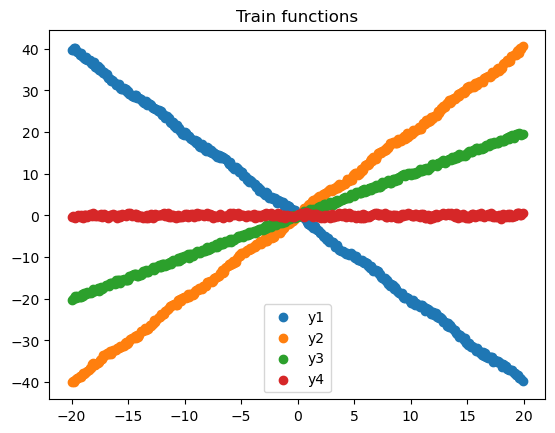

In [213]:
#train dataset
plt.title('Train functions')
plt.scatter(train['x'],train['y1'],label='y1')
plt.scatter(train['x'],train['y2'],label='y2')
plt.scatter(train['x'],train['y3'],label='y3')
plt.scatter(train['x'],train['y4'],label='y4')
plt.legend()

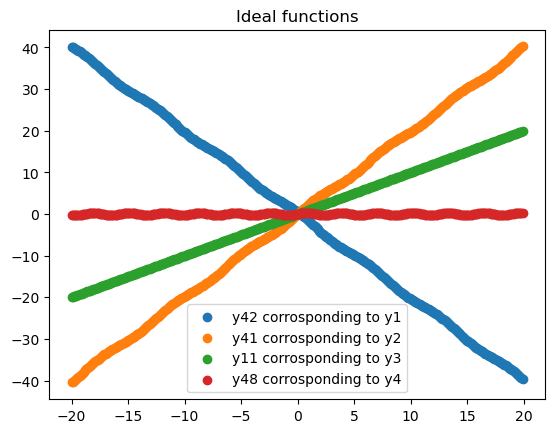

In [214]:
#relevant ideal functions
plt.title('Ideal functions')
plt.scatter(ideal['x'],ideal['y42'],label='y42 corrosponding to y1')
plt.scatter(ideal['x'],ideal['y41'],label='y41 corrosponding to y2')
plt.scatter(ideal['x'],ideal['y11'],label='y11 corrosponding to y3')
plt.scatter(ideal['x'],ideal['y48'],label='y48 corrosponding to y4')
plt.legend()

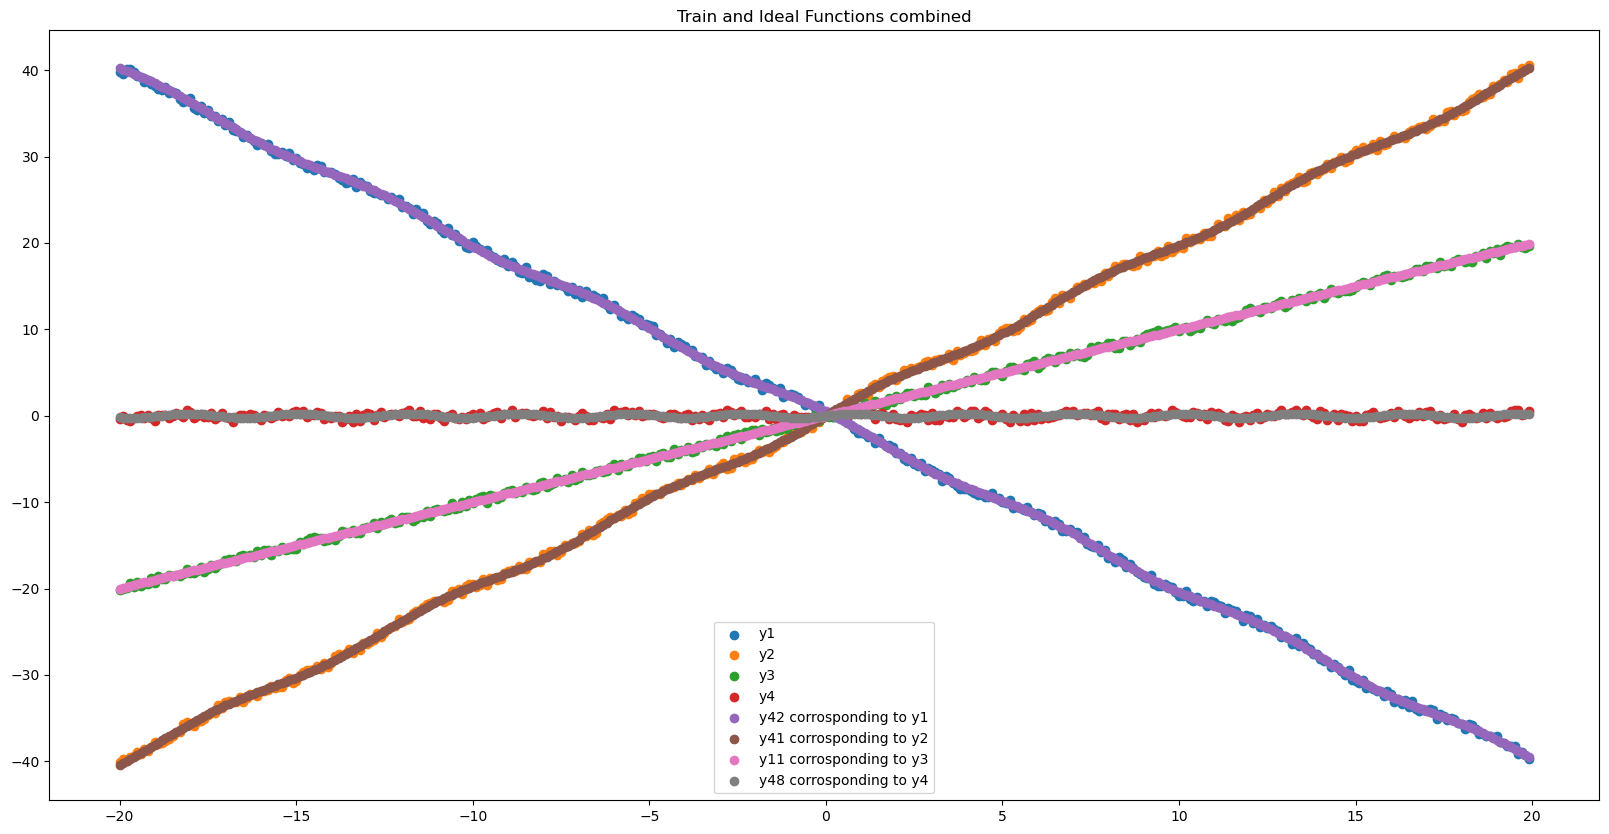

In [215]:
plt.figure(figsize=(20,10))
plt.title('Train and Ideal Functions combined')
plt.scatter(train['x'],train['y1'],label='y1')
plt.scatter(train['x'],train['y2'],label='y2')
plt.scatter(train['x'],train['y3'],label='y3')
plt.scatter(train['x'],train['y4'],label='y4')
plt.scatter(ideal['x'],ideal['y42'],label='y42 corrosponding to y1')
plt.scatter(ideal['x'],ideal['y41'],label='y41 corrosponding to y2')
plt.scatter(ideal['x'],ideal['y11'],label='y11 corrosponding to y3')
plt.scatter(ideal['x'],ideal['y48'],label='y48 corrosponding to y4')
plt.legend()

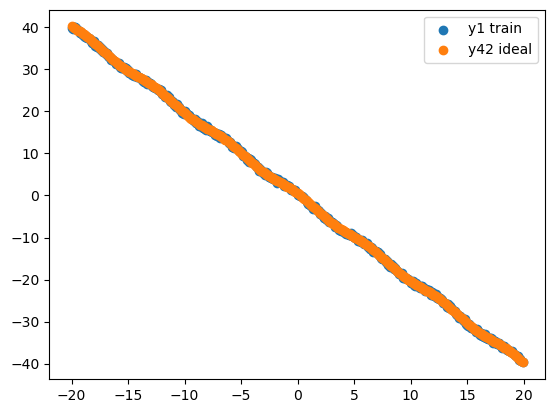

In [216]:
#individual visualization by overlapping training with ideal functions
plt.scatter(train['x'],train['y1'],label='y1 train')
plt.scatter(ideal['x'],ideal['y42'],label='y42 ideal')
plt.legend()

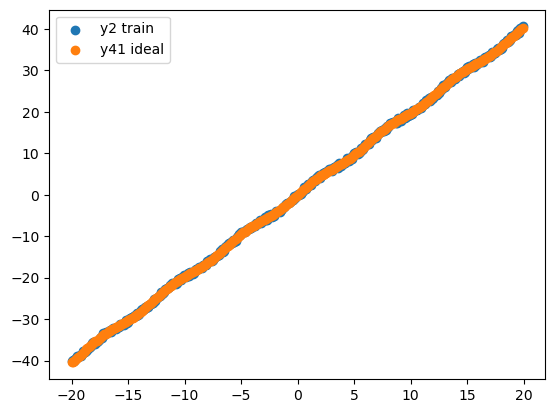

In [217]:
plt.scatter(train['x'],train['y2'],label='y2 train')
plt.scatter(ideal['x'],ideal['y41'],label='y41 ideal')
plt.legend()

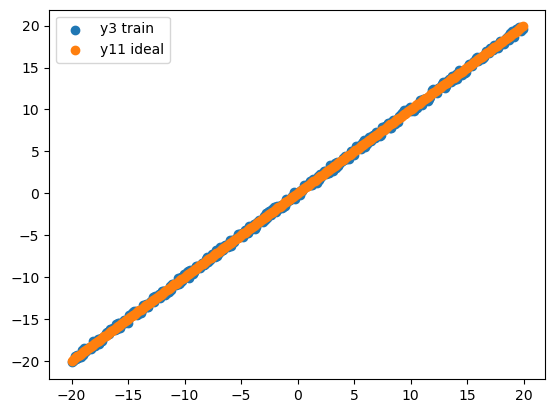

In [218]:
plt.scatter(train['x'],train['y3'],label='y3 train')
plt.scatter(ideal['x'],ideal['y11'],label='y11 ideal')
plt.legend()

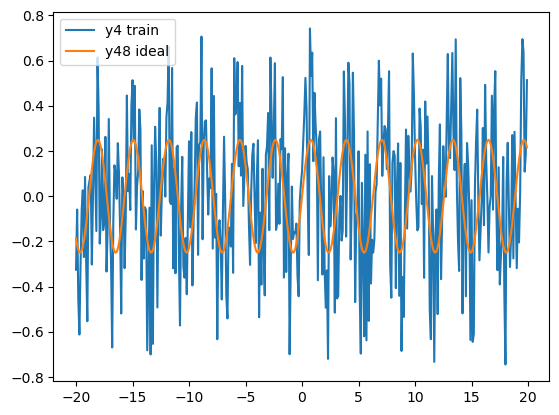

In [219]:
plt.plot(train['x'],train['y4'],label='y4 train')
plt.plot(ideal['x'],ideal['y48'],label='y48 ideal')
plt.legend()